In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and
covariance matrix. These parameters are analogous to the mean (average or "center") and variance (standard deviation, or "width," squared) of the one-dimensional normal distribution.

# 

Read the files labeled as 'sampleX.txt' using numpy or pandas and plot them.

In [ ]:
import pandas as pd

In [3]:
smp1 = pd.read_csv('sample1.txt', sep="\t")
smp2 = pd.read_csv('sample2.txt', sep="\t")
smp3 = pd.read_csv('sample3.txt', sep="\t")

In [ ]:
smp1

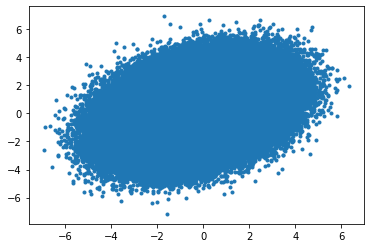

In [5]:
plt.plot(smp1['x'], smp1['y'], '.')

In [6]:
smp2

,x,y
0,0.870248,0.359338
1,-0.570291,1.137400
2,1.319536,-2.333256
3,-1.041993,-1.397937
4,-0.267094,-1.100576
...,...,...
999995,-0.792461,-2.177016
999996,-2.133305,-0.034110
999997,-1.220413,1.518266
999998,-0.041616,0.290849


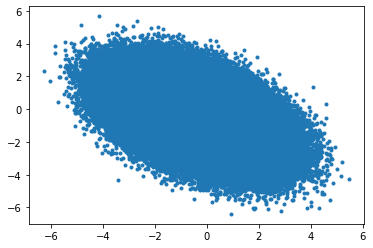

In [7]:
plt.plot(smp2['x'], smp2['y'], '.')

In [8]:
smp3

,x,y
0,1.006065,1.015372
1,0.672018,0.901308
2,-0.979334,0.248954
3,0.724723,1.607615
4,-0.845421,-1.495763
...,...,...
999995,0.164004,-0.087807
999996,1.674203,-0.253554
999997,-0.782615,-0.971350
999998,1.511114,0.757262


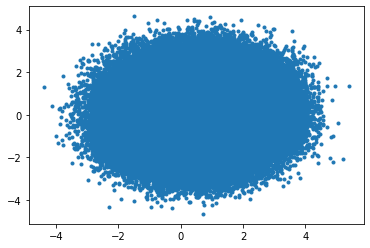

In [9]:
plt.plot(smp3['x'], smp3['y'], '.')

In [ ]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.plot(smp1['x'], smp1['y'], 'g.')
plt.subplot(132)
plt.plot(smp2['x'], smp2['y'], 'r.')
plt.subplot(133)
plt.plot(smp3['x'], smp3['y'], 'b.')
plt.show()


Determine whether each sample is correlated, anticorrelated or uncorrelated.

In [ ]:
smps = [smp1, smp2, smp3]
i = 1
for smp in smps:
    if smp['x'].corr(smp['y']) > 0.1:
        print('sample%i is correlated' %i)
    elif smp['x'].corr(smp['y']) < -0.1:
        print('sample%i is anticorrelated' %i)
    else:
        print('sample%i is uncorrelated' %i)
    i += 1


## 3d Plot
Plot the joint probability distribution of each sample in 3D. For this you can use 'plot_surface' found in matplotlib library.

If you want to plot using matplotlib, the codes below will come in handy. First line makes sure that your plots are interactive, second line provides color maps.

In [ ]:
from matplotlib import cm

At the first step try to get the 2D histogram of your data. (Hint: beware of different sizes of arrays!)

In [ ]:
bins = 100
h1 = plt.hist2d(smp1["x"], smp1["y"], bins = 100, density = True)
h2 = plt.hist2d(smp2["x"], smp2["y"], bins = 100, density = True)
h3 = plt.hist2d(smp3["x"], smp3["y"], bins = 100, density = True)

Now you can plot the 3D histogram:

In [ ]:
import matplotlib
matplotlib.rc_file_defaults()
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
X1 = h1[1][:-1]
Y1 = h1[2][:-1]
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = h1[0]
surf1 = ax.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm)
fig.colorbar(surf1, shrink=0.5, aspect=5)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
X2 = h2[1][:-1]
Y2 = h1[2][:-1]
X2, Y2 = np.meshgrid(X2, Y2)
Z2 = h2[0]
surf2 = ax.plot_surface(X2, Y2, Z2, cmap=cm.coolwarm)
fig.colorbar(surf2, shrink=0.5, aspect=5)
plt.show()

<IPython.core.display.Javascript object>


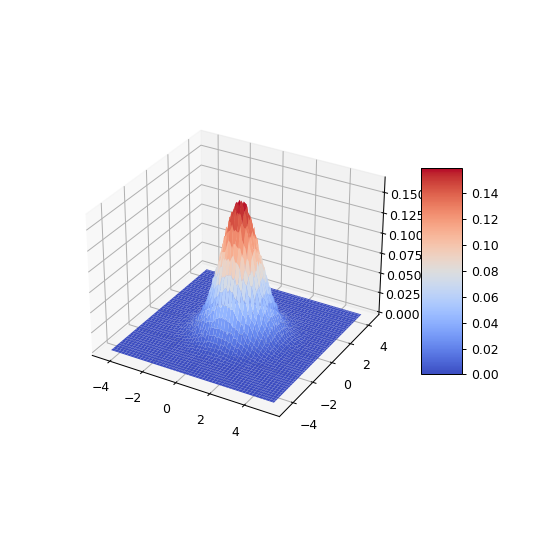

In [16]:
#Plot sample 3
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
X3 = h3[1][:-1]
Y3 = h3[2][:-1]
X3, Y3 = np.meshgrid(X3, Y3)
Z3 = h3[0]
surf3 = ax.plot_surface(X3, Y3, Z3, cmap=cm.coolwarm)
fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()


Using the calculated histograms, now write a code to calculate the marginalized PDFs along both axes and then plot them.

In [17]:
#Calculate marginalized distributions

In [ ]:
%matplotlib inline
sns.set() 

plt.figure(figsize=(15, 10))
plt.suptitle('Marginalized PDFs')

plt.subplot(3, 2, 1)
plt.hist(smp1['x'], bins = 100, density = True, label = 'x from sample 1')
plt.ylabel('Marginalized PDF')
plt.legend()

plt.subplot(3, 2, 2)
plt.hist(smp1['y'], bins = 100, density = True, label = 'y from sample 1')
plt.legend()

plt.subplot(3, 2, 3)
plt.hist(smp2['x'], bins = 100, density = True, label = 'x from sample 2')
plt.ylabel('Marginalized PDF')
plt.legend()

plt.subplot(3, 2, 4)
plt.hist(smp2['y'], bins = 100, density = True, label = 'y from sample 2')
plt.legend()

plt.subplot(3, 2, 5)
plt.hist(smp3['x'], bins = 100, density = True, label = 'x from sample 3')
plt.ylabel('Marginalized PDF')
plt.legend()

plt.subplot(3, 2, 6)
plt.hist(smp3['y'], bins = 100, density = True, label = 'y from sample 3')
plt.legend()

plt.show()

## Extra example:

You can also combine the two steps above and plot the joint PDF and the marginalized ones altogether using seaborn.

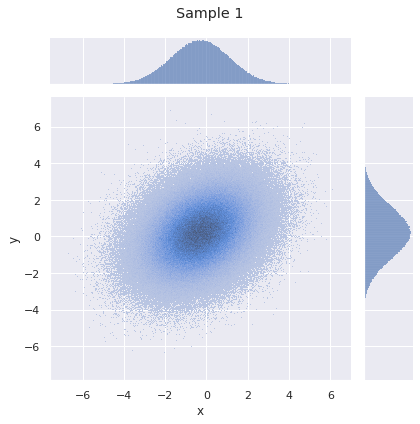

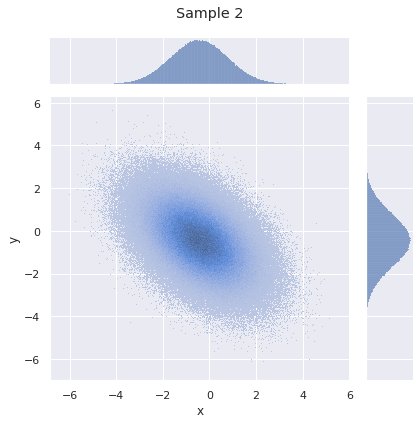

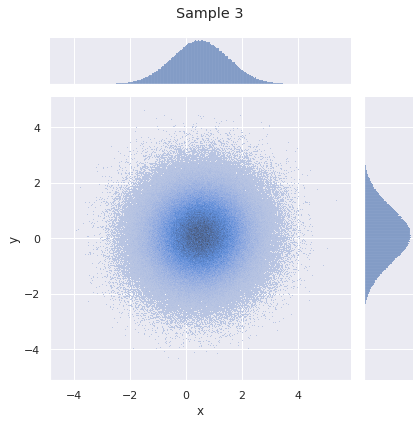

In [19]:
g1 = sns.jointplot(data=smp1, x='x', y='y', kind='hist')
g1.fig.suptitle('Sample 1')
g1.fig.tight_layout()

g2 = sns.jointplot(data=smp2, x='x', y='y', kind='hist')
g2.fig.suptitle('Sample 2')
g2.fig.tight_layout()

g3 = sns.jointplot(data=smp3, x='x', y='y', kind='hist')
g3.fig.suptitle('Sample 3')
g3.fig.tight_layout()

plt.show()

## Contour Plots

Plot the contours of the datasets showing different values of contours.

<IPython.core.display.Javascript object>


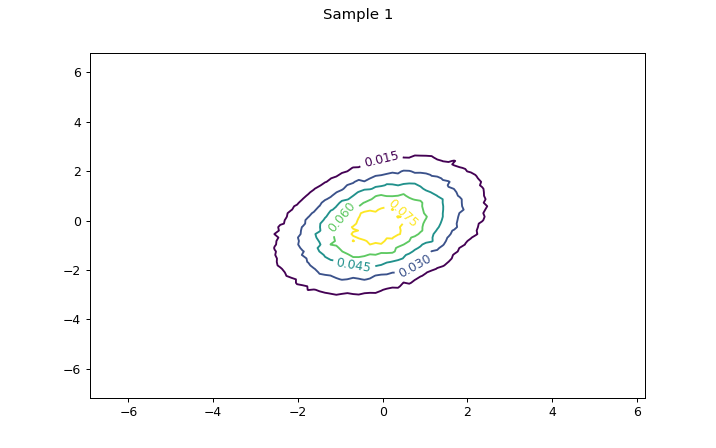

In [81]:
%matplotlib notebook
matplotlib.rc_file_defaults()
plt.figure(figsize=(8, 5))
plt.suptitle('Sample 1')
CS = plt.contour(X1[0], Y1[:, 0], Z1, levels = np.linspace(0.015, 0.075, 5))
plt.clabel(CS)

plt.show()

<IPython.core.display.Javascript object>


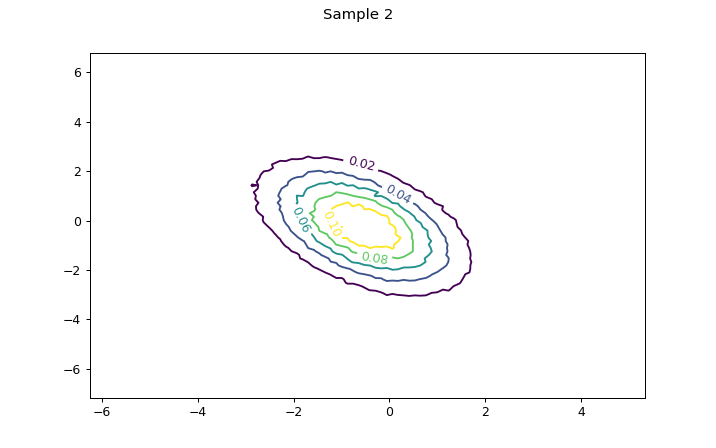

In [21]:
#Contour od Sample 2
plt.figure(figsize=(8, 5))
plt.suptitle('Sample 2')
CS = plt.contour(X2[0], Y2[:, 0], Z2, levels = np.linspace(0.02, 0.1, 5))
plt.clabel(CS)
plt.show()

<IPython.core.display.Javascript object>


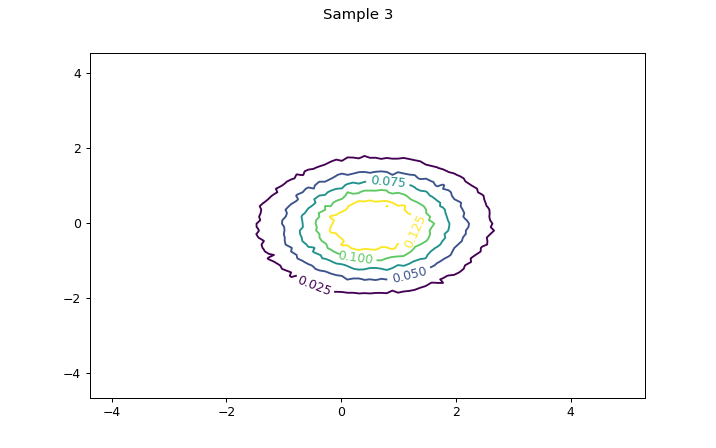

In [22]:
#Contour of Sample 3
plt.figure(figsize=(8, 5))
plt.suptitle('Sample 3')
CS = plt.contour(X3[0], Y3[:, 0], Z3, levels = np.linspace(0.025, 0.125, 5))
plt.clabel(CS)
plt.show()


## 3 parts
In the multivariate case, a gaussian distribution is defined via a mean and a covrience matrix. Here the covarience matrix is the equivalant of varience in higher dimensions. To refresh your mind, take a look at the [Wikipedia page](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Notation_and_parameterization). A correlation matrix is very similiar but has some [subtle differences](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices). 

Now using those defenitions, find the **covariance** (part 1) and **correlation** (part 2) matrices for each distribution. Are they the same? why? (part 3)

(Hint 1: You may find scipy.stats useful)

(Hint 2: Study the lecture note titled: 'parameter estimation 7' once more)

(Hint 3: [This lecture note](https://pages.ucsd.edu/~rlevy/lign251/fall2007/lecture_4.pdf) may also be useful, althogh the codes aren't written in python)

In [23]:
#Code here

In [24]:
cov1 = smp1.cov().to_numpy()
corr1 = smp1.corr().to_numpy()
print('covariance matrix of sample 1:\n', cov1, '\n\n')
print('correlation matrix of sample 1:\n', corr1)

covariance matrix of sample 1:
 [[1.99903077 0.65162065]
 [0.65162065 2.00168649]] 


correlation matrix of sample 1:
 [[1.         0.32575198]
 [0.32575198 1.        ]]


In [25]:
cov2 = smp2.cov().to_numpy()
corr2 = smp2.corr().to_numpy()
print('covariance matrix of sample 2:\n', cov2, '\n\n')
print('correlation matrix of sample 2:\n', corr2)

covariance matrix of sample 2:
 [[ 1.50378917 -0.710057  ]
 [-0.710057    1.50240817]] 


correlation matrix of sample 2:
 [[ 1.         -0.47239552]
 [-0.47239552  1.        ]]


In [26]:
cov3 = smp3.cov().to_numpy()
corr3 = smp3.corr().to_numpy()
print('covariance matrix of sample 3:\n', cov3, '\n\n')
print('correlation matrix of sample 3:\n', corr3)

covariance matrix of sample 3:
 [[0.99966191 0.03105916]
 [0.03105916 0.99897916]] 


correlation matrix of sample 3:
 [[1.         0.03108028]
 [0.03108028 1.        ]]


the covariance matrix and the correlation matrix are not generally the same because if $X_1, ..., X_n$ are random variables, then:

$cov(X)_{i, j} = E[(X_i - E[X_i])(X_j - E[X_j])]$

while

$corr(X)_{i, j} = \frac{cov(X)_{i, j}}{\sigma_i \sigma_j}$

thus they are different unless $\sigma_i = \sigma_j = 1$, which is not the case in our datasets.


## 2 parts

Now, only focus on the positievly correlated distribution. If the errors along both of the axes are huge, (as discussed in the lecture 'parameter estimation 7'), Is there a linear combination of the two parameters that can be well constrained? Discuss it (part 1).  Find the mode of the distribution (part 2)

to do this we may use an orthogonal transformation that diagonalizes the covariance matix, this is possible since the covariance matrix is symmetric.

In [39]:
eigen_values, eigen_vectors = np.linalg.eig(cov1)

In [40]:
def diagonalize(row):
    return np.matmul(eigen_vectors.T, np.array(row))

In [41]:
Z = smp1.transform(diagonalize, axis = 1)

<IPython.core.display.Javascript object>


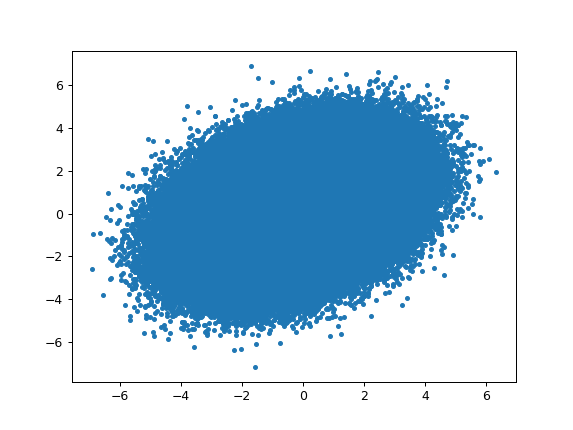

In [45]:
plt.plot(smp1['x'], smp1['y'], '.')

<IPython.core.display.Javascript object>


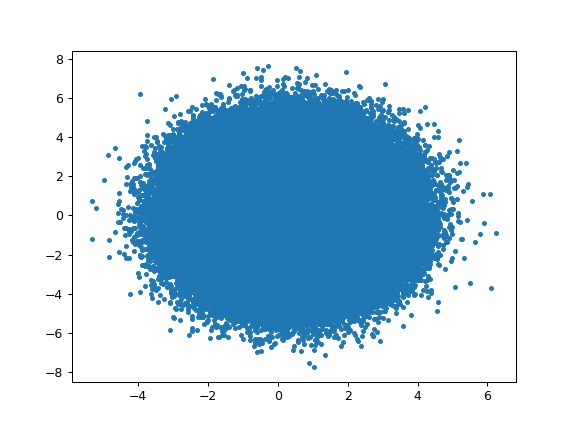

In [46]:
plt.plot(Z['x'], Z['y'], '.')

In [36]:
smp1.cov(), Z.cov()

(          x         y
 x  1.999031  0.651621
 y  0.651621  2.001686,
               x             y
 x  1.348737e+00 -2.368213e-15
 y -2.368213e-15  2.651981e+00)

as we can see above, this diagonalization does not change the variances substantially.

# Real World
let's apply this to real world data and using house price data. first import house_data.csv

In [3]:
df = pd.read_csv('House_price.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


you can see detail of your dataframe with the code below

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now select the columns of the train set with numerical data

In [6]:
#Code here
df_num = df.select_dtypes(include=np.number)

In [7]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Plot the distribution of all the numerical data

In [20]:
#Code here

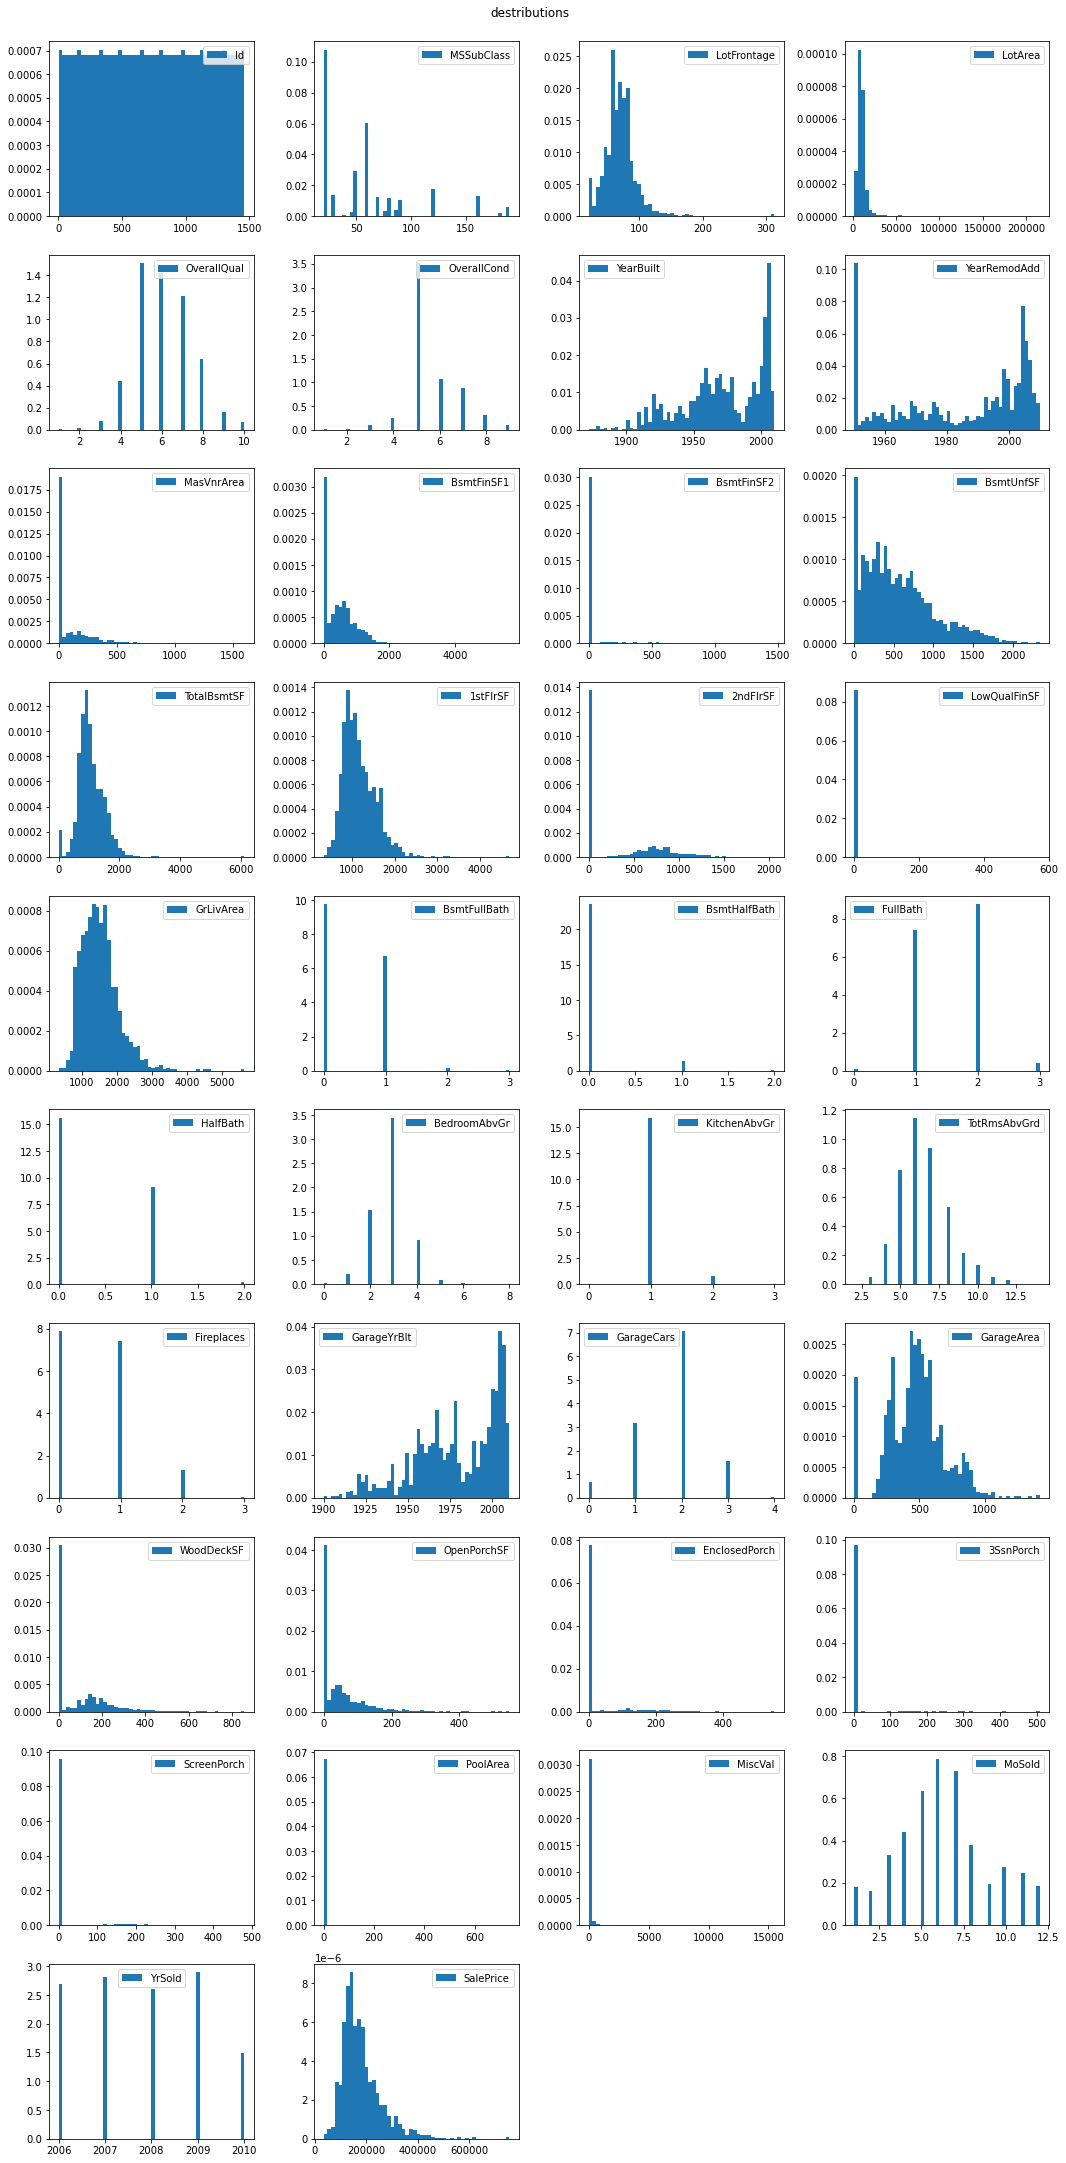

In [19]:
plt.figure(figsize=(15, 30))
plt.suptitle('destributions', y = 1)

i = 1
for feature in df_num.columns:
    plt.subplot(10, 4, i)
    plt.hist(df_num[feature], bins = 50, density = True, label = feature)
    #plt.ylabel('Marginalized PDF')
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()


plot Heatmap for all the remaining numerical data including the 'SalePrice'

In [1]:
corr = df_num.corr()

NameError: name 'df_num' is not defined

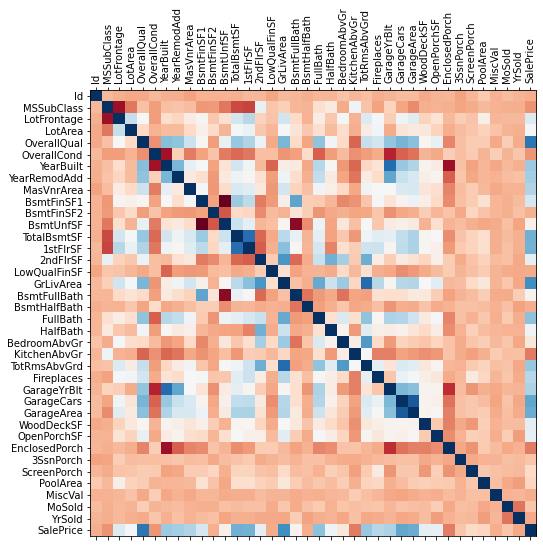

In [23]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);


<AxesSubplot:>

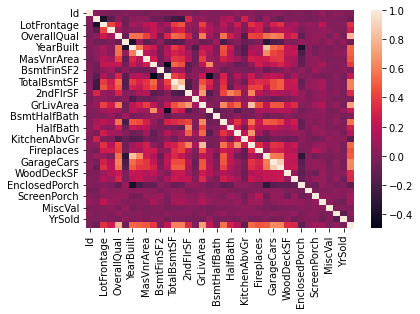

In [24]:
sns.heatmap(corr)

From the distribution of each numerical variables as well as the heatmap you can notice columns that are important and correlated (correlation higher than absolute 0.3) with our target variable 'SalePrice'. select columns where the correlation with 'SalePrice' is higher than |0.3|


In [41]:
relevant = corr[np.abs(corr['SalePrice']) > 0.3].index

In [48]:
new_df = df_num[relevant]

In [49]:
new_df

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,2000,0.0,0,953,953,694,1647,2,7,1,1999.0,2,460,0,40,175000
1456,85.0,6,1978,1988,119.0,790,1542,2073,0,2073,2,7,2,1978.0,2,500,349,0,210000
1457,66.0,7,1941,2006,0.0,275,1152,1188,1152,2340,2,9,2,1941.0,1,252,0,60,266500
1458,68.0,5,1950,1996,0.0,49,1078,1078,0,1078,1,5,0,1950.0,1,240,366,0,142125


Now choose Features with high correlation (higher than 0.5) and plot the correlation of each feature with SalePrice

In [50]:
highly_correlated = corr[np.abs(corr['SalePrice']) > 0.5].index

In [53]:
high_correlations = [df_num['SalePrice'].corr(df_num[feature]) for feature in highly_correlated]

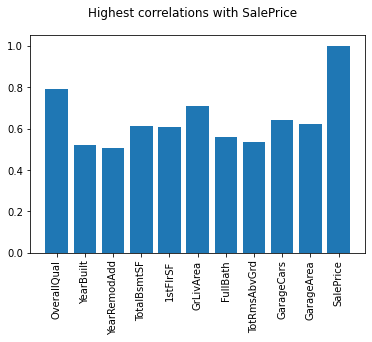

In [58]:
plt.suptitle('Highest correlations with SalePrice')
plt.bar(highly_correlated, high_correlations)
plt.xticks(rotation=90)
plt.show()

Check the NaN of dataframe set by ploting percent of missing values per column and plot the result

In [65]:
n = len(df)
features = df.columns
percentage_of_missing_values = [df[feature].isna().sum() / n for feature in features]

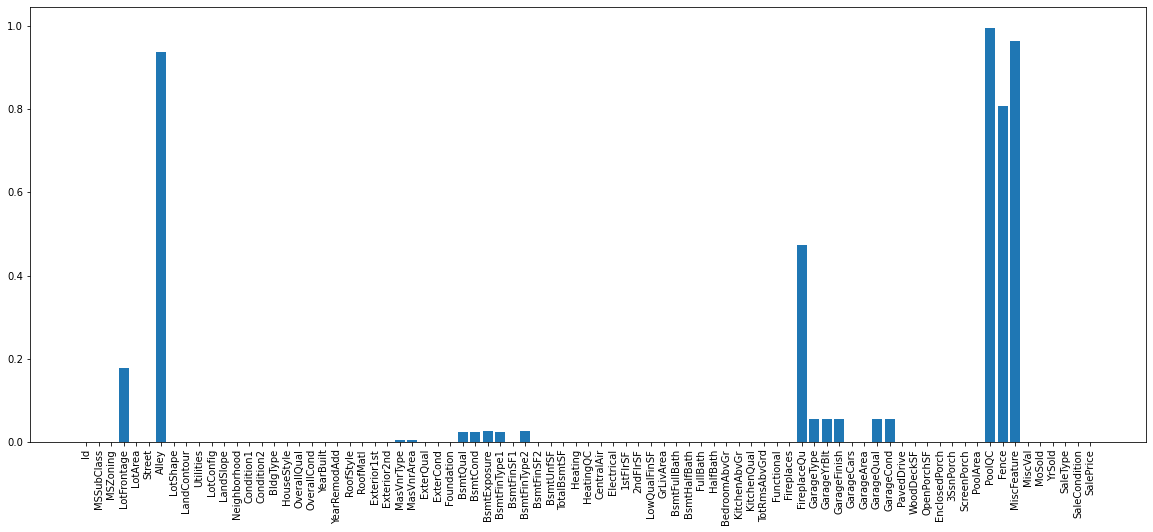

In [69]:
plt.figure(figsize=(20, 8))
plt.bar(features, percentage_of_missing_values)
plt.xticks(rotation=90)
plt.show()

In [76]:
nonzero_percentage_of_missing_values = {features[i]: percentage_of_missing_values[i] for i in range(len(features)) if percentage_of_missing_values[i] > 0}

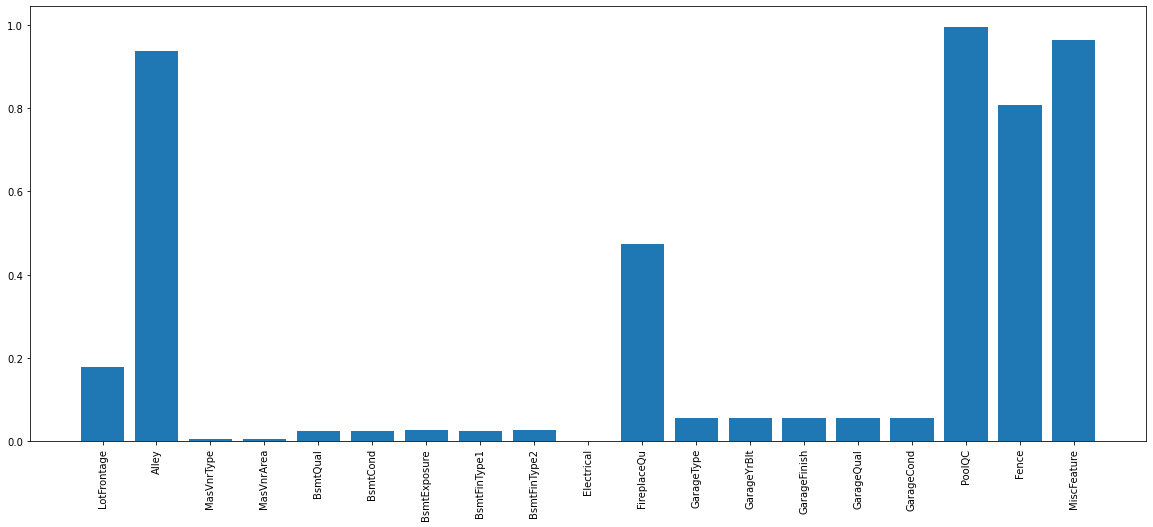

In [82]:
plt.figure(figsize=(20, 8))
plt.bar(nonzero_percentage_of_missing_values.keys(), nonzero_percentage_of_missing_values.values())
plt.xticks(rotation=90)
plt.show()

in the last session I think Amirreza said that droping Nan cells is not suited in many projects cause
it can remove alots of information of your dataframe. ofcourse he is right and I would like to give a short introduction to the process of handling Nan cells which is called "Imputation". Data imputation is the substitution of estimated values for missing or inconsistent data items (fields). The substituted values are intended to create a data record that does not fail edits. here you can use Simple_

In [84]:
from sklearn.impute import SimpleImputer

In [86]:
my_imputer = SimpleImputer(strategy="median")
df_num_imputed = pd.DataFrame(my_imputer.fit_transform(df_num))

In [88]:
df_num_imputed

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


# Categorical features

## Explore and clean Categorical features

find all Catagorical columns. you can use the code for finding the numerical columns and just using 'object' for dtype.

In [89]:
df_categorical = df.select_dtypes(include=object)

In [91]:
df_categorical

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Countplot for each of the categorical features in the train set